In [45]:
import pandas as pd
import re
import numpy as np
import pickle
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt


In [2]:
#import preprocessed data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
X_train_text,y_train = pickle.load(open("/content/drive/MyDrive/ Competitions/ Predict_the_news_category/ data/train_data.pkl", 'rb')) 
X_test_text= pickle.load(open("/content/drive/MyDrive/ Competitions/ Predict_the_news_category/ data/test_data.pkl",'rb'))

X_cv_text,y_cv =  pickle.load(open("/content/drive/MyDrive/ Competitions/ Predict_the_news_category/ data/cv_data.pkl",'rb'))

In [4]:
print(len(X_train_text),y_train.shape)
print(len(X_test_text))
print(len(X_cv_text),y_cv.shape)
print(X_train_text[0])

6712 (6712,)
2748
916 (916,)
airtel vodafone idea continue cede ground reliance jio market share losses two consecutive quarters companies. mint pace reliance jio monthly user base additions slowed still easily outpacing airtel vodafone idea reliance jio gained share urban areas despite airtel vodafone idea focus regions


In [5]:
from tqdm import tqdm
from sklearn.metrics import accuracy_score

In [6]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences 
from keras.utils import to_categorical

In [7]:
import tensorflow as tf

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer,LancasterStemmer
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [9]:
X_train_tokens,X_test_tokens,X_cv_tokens,max_len,vocab_size_text=pickle.load(open("/content/drive/MyDrive/ Competitions/ Predict_the_news_category/ data/tokens.pkl", 'rb')) 

In [10]:
print('shape of X_train_tokens ',X_train_tokens.shape)
print('shape of X_test_tokens ',X_test_tokens.shape)
print('shape of X_cv_tokens ',X_cv_tokens.shape)
print(max_len,vocab_size_text)

shape of X_train_tokens  (6712, 591)
shape of X_test_tokens  (2748, 591)
shape of X_cv_tokens  (916, 591)
591 24749


In [11]:
X_train_tfidf,y_train = pickle.load(open("/content/drive/MyDrive/ Competitions/ Predict_the_news_category/ data/train_tfidf.pkl", 'rb')) 
X_test_tfidf = pickle.load(open("/content/drive/MyDrive/ Competitions/ Predict_the_news_category/ data/test_tfidf.pkl",'rb'))
X_cv_tfidf,y_cv =  pickle.load(open("/content/drive/MyDrive/ Competitions/ Predict_the_news_category/ data/cv_tfidf.pkl",'rb'))

In [12]:
print(X_train_tfidf.shape,y_train.shape)
print(X_test_tfidf.shape)
print(X_cv_tfidf.shape,y_cv.shape)

(6712, 16859) (6712,)
(2748, 16859)
(916, 16859) (916,)


In [13]:
tfidf_w2v_tr,y_train = pickle.load(open("/content/drive/MyDrive/ Competitions/ Predict_the_news_category/ data/train_w2v.pkl", 'rb')) 
tfidf_w2v_te = pickle.load(open("/content/drive/MyDrive/ Competitions/ Predict_the_news_category/ data/test_w2v.pkl",'rb'))
tfidf_w2v_cv,y_cv =  pickle.load(open("/content/drive/MyDrive/ Competitions/ Predict_the_news_category/ data/cv_w2v.pkl",'rb'))

In [14]:
print(tfidf_w2v_tr.shape,y_train.shape)
print(tfidf_w2v_te.shape )
print(tfidf_w2v_cv.shape,y_cv.shape)

(6712, 300) (6712,)
(2748, 300)
(916, 300) (916,)


In [15]:
X_train_pooled_output,X_test_pooled_output,X_cv_pooled_output= pickle.load(open('/content/drive/MyDrive/ Competitions/ Predict_the_news_category/ data/final_bert_output.pkl', 'rb'))

In [16]:
print(X_train_pooled_output.shape)
print(X_test_pooled_output.shape)
print(X_cv_pooled_output.shape)

(6712, 768)
(2748, 768)
(916, 768)


In [17]:
tfidf_300_tr,y_train = pickle.load(open("/content/drive/MyDrive/ Competitions/ Predict_the_news_category/ data/train_300.pkl", 'rb')) 
tfidf_300_te= pickle.load(open("/content/drive/MyDrive/ Competitions/ Predict_the_news_category/ data/test_300.pkl",'rb'))
tfidf_300_cv,y_cv =  pickle.load(open("/content/drive/MyDrive/ Competitions/ Predict_the_news_category/ data/cv_300.pkl",'rb'))

In [18]:
print(tfidf_300_tr.shape,y_train.shape)
print(tfidf_300_te.shape)
print(tfidf_300_cv.shape,y_cv.shape)

(6712, 300) (6712,)
(2748, 300)
(916, 300) (916,)


In [19]:
y_train_c=to_categorical(y_train)
y_cv_c=to_categorical(y_cv)
print(y_train_c.shape,y_cv_c.shape)

(6712, 4) (916, 4)


In [20]:
tfidf_tr_mix=tfidf_300_tr*0.4+tfidf_w2v_tr*0.6
tfidf_cv_mix=tfidf_300_cv*0.4+tfidf_w2v_cv*0.6
tfidf_te_mix=tfidf_300_te*0.4+tfidf_w2v_te*0.6

tfidf_tr_mix.shape,tfidf_cv_mix.shape,tfidf_te_mix.shape

((6712, 300), (916, 300), (2748, 300))

In [21]:
from keras.layers import Dense,Input,Embedding,Flatten,LSTM,Dropout,BatchNormalization,concatenate,Bidirectional,SpatialDropout1D,Conv1D,Convolution1D,GlobalMaxPool1D,GRU
from keras.models import Model,Sequential
from keras.backend import clear_session
from keras.optimizers import SGD,Adam,Adamax,Adadelta,Adagrad,RMSprop
from tensorflow.keras.regularizers import l1,l1_l2,l2
import keras
from keras.backend import clear_session
from keras.models import load_model

In [22]:
#early stopping
from tensorflow.keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor='val_accuracy', patience=6,restore_best_weights=True,verbose=1,mode='max')

In [23]:
class LossHistory(tf.keras.callbacks.Callback):
    
    def on_train_begin(self, logs={}):
        ## on begin of training, we are creating a instance varible called history
        ## it is a dict with keys [loss, acc, val_loss, val_acc]
        self.history={'loss': [],'acc': [],'val_loss': [],'val_acc': []}
        
    def on_epoch_end(self, epoch, logs={}):
        ## on end of each epoch, we will get logs and update the self.history dict
        self.history['loss'].append(logs.get('loss'))
        self.history['acc'].append(logs.get('accuracy'))
        if logs.get('val_loss', -1) != -1:
            self.history['val_loss'].append(logs.get('val_loss'))
        if logs.get('val_accuracy', -1) != -1:
            self.history['val_acc'].append(logs.get('val_accuracy'))
            
history_own=LossHistory()   

In [24]:
from keras.callbacks import LearningRateScheduler
def changeLearningRate(epoch,lr):
    if len(history_own.history['val_acc'])>1: #check if there there two elements   
        if(history_own.history['val_acc'][-1] < history_own.history['val_acc'][-2]): 
            return(lr-(0.1*lr))
    if ((epoch+1)%5)==0 and epoch!=0:
        return(lr-(0.05*lr))
    else:
        return lr
lrschedule = LearningRateScheduler(changeLearningRate, verbose=1)

In [25]:
from keras.callbacks import  ModelCheckpoint
path='/content/drive/MyDrive/ Competitions/ Predict_the_news_category/ models'
model_checkpoint = ModelCheckpoint(filepath=path,save_weights_only=False,monitor='val_accuracy',mode='max',save_best_only=True)

In [26]:
callback_list = [history_own,earlystop,lrschedule,model_checkpoint] 

In [27]:
X_train_tfidf=X_train_tfidf.toarray()
X_cv_tfidf=X_cv_tfidf.toarray()
X_test_tfidf=X_test_tfidf.toarray()

In [28]:
dim=300
bs=32

In [29]:
def argmax(p):
  pa=[]
  for i in p:
    pa.append(np.argmax(i))
  return pa

In [31]:
clear_session()
 
input1 =Input(shape=(X_train_tokens.shape[1],),dtype="int32",name='Text_Tokens')
x11 = Embedding(vocab_size_text+1, dim)(input1)
# x = SpatialDropout1D(0.3)(x)
# Add 2 bidirectional LSTMs
x12 = Bidirectional(GRU(128,recurrent_dropout=0.3,return_sequences=True))(x11)
x13 = Bidirectional(GRU(128,recurrent_dropout=0.2))(x12)
x14 = Dense(128,activation="relu")(x13)
x15 = Dropout(0.4)(x14)
x16 = Dense(128)(x15)
flatten1=Flatten(name='flatten1')(x16)
#------------------------------------
input2 =Input(shape=(tfidf_w2v_tr.shape[1],),name='w2v_gensim')
x21 = Dense(128*2,activation="relu")(input2)
x22 = Dropout(0.4)(x21)
x23 = Dense(128)(x22)
x24 = BatchNormalization()(x23)
x25 = Dense(128)(x24) 
flatten2=Flatten(name='flatten2')(x25)
#------------------------------------
input3 =Input(shape=(tfidf_300_tr.shape[1],),name='w2v_glove')
x31 = Dense(128*2,activation="relu")(input3)
x32 = Dropout(0.4)(x31)
x33 = Dense(128)(x32)
x34 = BatchNormalization()(x33)
x35 = Dense(128)(x34) 
flatten3=Flatten(name='flatten3')(x35)
#------------------------------------
input4 =Input(shape=(tfidf_tr_mix.shape[1],),name='w2v_mix')
x41 = Dense(128*2,activation="relu")(input4)
x42 = Dropout(0.4)(x41)
x43 = Dense(128)(x42)
x44 = BatchNormalization()(x43)
x45 = Dense(128)(x44) 
flatten4=Flatten(name='flatten4')(x45)
#------------------------------------
input5 =Input(shape=(X_train_pooled_output.shape[1],),name='Bert_encoded')
x51 = Dense(128*2,activation="relu")(input5)
x52 = Dropout(0.4)(x51)
x53 = Dense(128)(x52)
x54 = BatchNormalization()(x53)
x55 = Dense(128)(x54) 
flatten5=Flatten(name='flatten5')(x55)
#------------------------------------
input6 =Input(shape=(X_train_tfidf.shape[1],),name='TfIdf')
x61 = Dense(128*2,activation="relu")(input6)
x62 = Dropout(0.4)(x61)
x63 = Dense(128)(x62)
x64 = BatchNormalization()(x63)
x65 = Dense(128)(x64) 
flatten6=Flatten(name='flatten6')(x65)
#------------------------------------
concat=concatenate(inputs=[flatten1,flatten2,flatten3,flatten4,flatten5,flatten6],name='concatinate')
x = Dense(128*2)(concat)
x = Dense(128)(x)
x = BatchNormalization()(x)
# Add a classifier
out_puts = Dense(4, activation="softmax")(x)

In [33]:
model5=Model(inputs=[input1,input2,input3,input4,input5,input6],outputs=out_puts)
model5.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Text_Tokens (InputLayer)        [(None, 591)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 591, 300)     7425000     Text_Tokens[0][0]                
__________________________________________________________________________________________________
w2v_gensim (InputLayer)         [(None, 300)]        0                                            
__________________________________________________________________________________________________
w2v_glove (InputLayer)          [(None, 300)]        0                                            
____________________________________________________________________________________________

In [34]:
opt = keras.optimizers.Adam(learning_rate=0.001)
model5.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

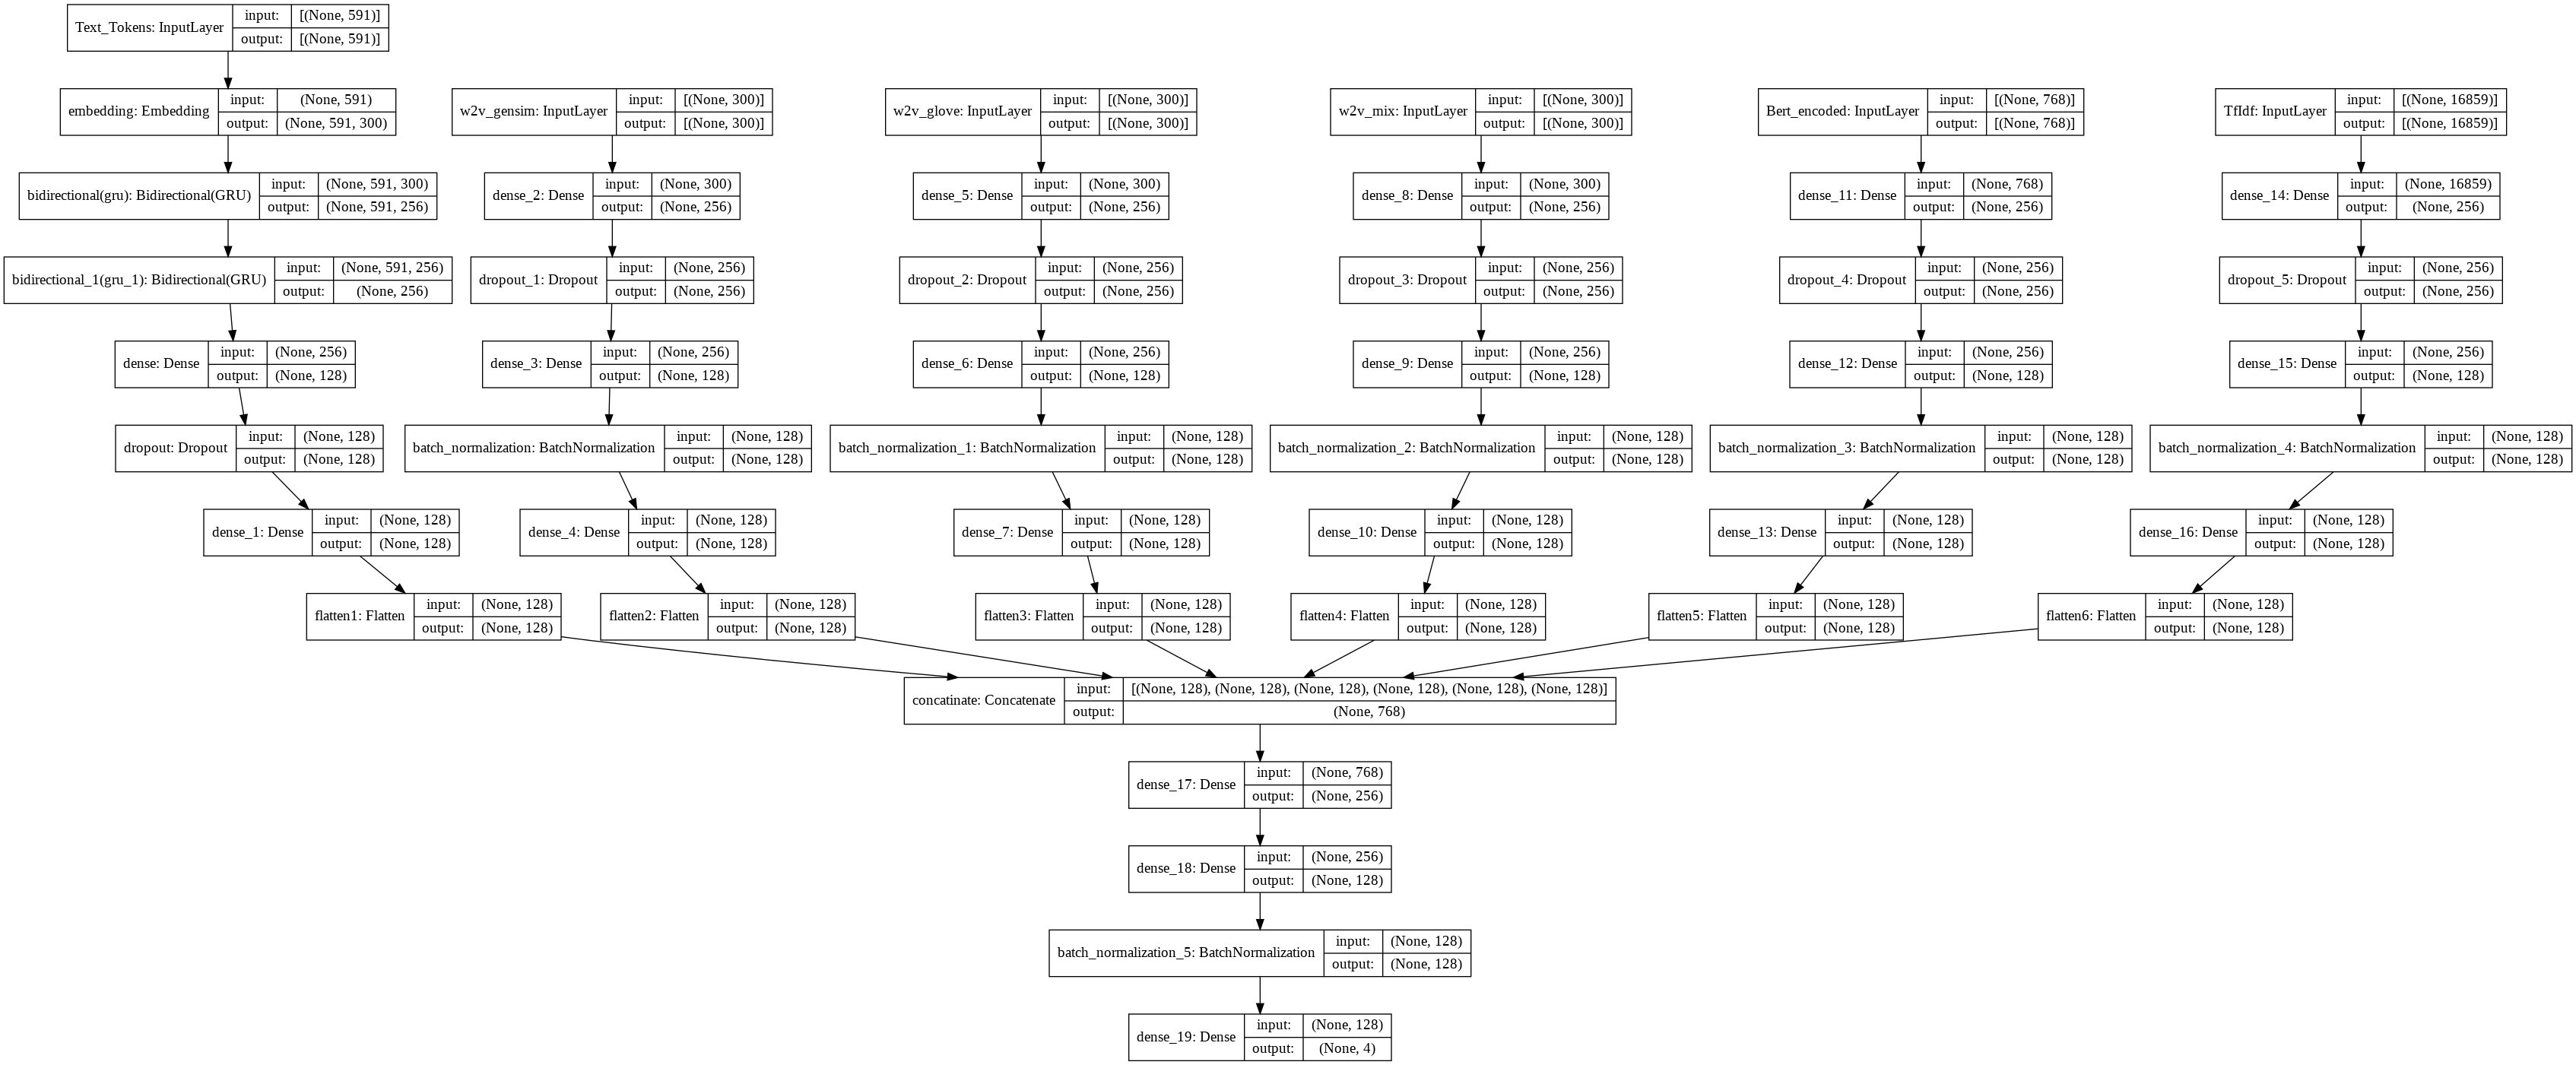

In [35]:
keras.utils.plot_model(model5,'model5.png',show_shapes=True)

In [36]:
model5.fit([X_train_tokens,tfidf_w2v_tr,tfidf_300_tr,tfidf_tr_mix,X_train_pooled_output,X_train_tfidf],y_train_c,batch_size=bs,epochs=25,validation_data=([X_cv_tokens,tfidf_w2v_cv,tfidf_300_cv,tfidf_cv_mix,X_cv_pooled_output,X_cv_tfidf],y_cv_c),callbacks=callback_list)

Epoch 1/25

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
210/210 [==============================] - 1195s 6s/step - loss: 0.3906 - accuracy: 0.8799 - val_loss: 0.1846 - val_accuracy: 0.9574
INFO:tensorflow:Assets written to: /content/drive/MyDrive/ Competitions/ Predict_the_news_category/ models/assets
Epoch 2/25

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
210/210 [==============================] - 1195s 6s/step - loss: 0.0691 - accuracy: 0.9798 - val_loss: 0.0868 - val_accuracy: 0.9705
INFO:tensorflow:Assets written to: /content/drive/MyDrive/ Competitions/ Predict_the_news_category/ models/assets
Epoch 3/25

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
210/210 [==============================] - 1228s 6s/step - loss: 0.0457 - accuracy: 0.9878 - val_loss: 0.1114 - val_accuracy: 0.9716
INFO:tensorflow:Assets written to: /content/drive/MyDrive/ Competitions/ Predict_the_

In [37]:
model5.save('/content/drive/MyDrive/ Competitions/ Predict_the_news_category/model_5.h5')

In [38]:
model5=load_model('/content/drive/MyDrive/ Competitions/ Predict_the_news_category/model_5.h5')

In [39]:
#[X_test_text,tfidf_w2v_te,tfidf_300_te,X_test_pooled_output,X_test_tfidf]
#p=model5.predict([X_cv_text,tfidf_w2v_cv,tfidf_300_cv,X_cv_pooled_output,X_cv_tfidf])
p=model5.predict([X_test_tokens,tfidf_w2v_te,tfidf_300_te,tfidf_te_mix,X_test_pooled_output,X_test_tfidf])

In [40]:
p_test=argmax(p)

In [41]:
path='/content/drive/MyDrive/ Competitions/ Predict_the_news_category/predictions_15.xlsx'
pd.DataFrame(p_test, columns = ['SECTION']).to_excel('/content/drive/MyDrive/ Competitions/ Predict_the_news_category/predictions_15.xlsx',index=False)

In [42]:
pdf=pd.read_excel(path)
pdf.head()

,SECTION
0,1
1,2
2,1
3,0
4,1


In [43]:
history_own

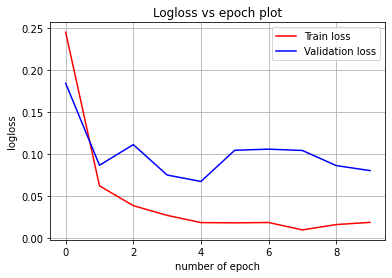

In [46]:
plt.plot(history_own.history['loss'], 'r')
plt.plot(history_own.history['val_loss'], 'b')
plt.legend({'Train loss': 'r', 'Validation loss':'b'})
plt.ylabel('logloss')
plt.xlabel('number of epoch')
plt.title('Logloss vs epoch plot')
plt.grid()
plt.show()